In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from src.baseSIR import no_ext_sir
from src.baseSIR import timed_sir
from src.baseSIR import real_si
from decimal import Decimal, ROUND_UP
import time
import pandas as pd
from src.ABC import ABC_rejection
from src.ABC import ABC_core
from src.ABC import sum_sqrt_sq_distance

In [3]:
applied_ABC1 = np.genfromtxt("../../Home made ABC Results/Traj1_1000b.csv",delimiter=",")
applied_ABC2 = np.genfromtxt("../../Home made ABC Results/Traj1_100b.csv",delimiter=",")
applied_ABC3 = np.genfromtxt("../../Home made ABC Results/Traj1_10b.csv",delimiter=",")
applied_ABC4 = np.genfromtxt("../../Home made ABC Results/Traj1_10b_iterate.csv",delimiter=",")

In [4]:
min_distance = min(applied_ABC4[:,1])
max_distance = max(applied_ABC4[:,1])
threshold_schedule = np.linspace(min_distance,max_distance,2000)[1:100:10]
print(threshold_schedule)

[1002127.54177089 1920962.95947974 2839798.37718859 3758633.79489745
 4677469.2126063  5596304.63031516 6515140.04802401 7433975.46573287
 8352810.88344172 9271646.30115058]


In [23]:
results = pd.DataFrame(applied_ABC1, columns=["Beta","Distance"])
sort_res = results.sort_values(by="Distance")
perc_50 = sort_res.iloc[0:int(len(sort_res.index)/2)]
perc_20 = sort_res.iloc[0:int(len(sort_res.index)/5)]
perc_10 = sort_res.iloc[0:int(len(sort_res.index)/10)]
perc_5 = sort_res.iloc[0:int(len(sort_res.index)/20)]
perc_2 = sort_res.iloc[0:int(len(sort_res.index)/50)]
perc_1 = sort_res.iloc[0:int(len(sort_res.index)/100)]
thresh_1 = perc_1.iloc[-1,1]
thresh_2 = perc_2.iloc[-1,1]
thresh_5 = perc_5.iloc[-1,1]
thresh_10 = perc_10.iloc[-1,1]
thresh_20 = perc_20.iloc[-1,1]
thresh_50 = perc_50.iloc[-1,1]
threshold_schedule = [thresh_1,thresh_2,thresh_5,thresh_10,thresh_20,thresh_50]
reference = [1,2,5,10,20,50]

C:\Users\ollie\AppData\Local\Temp\ipykernel_34260\3622323299.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


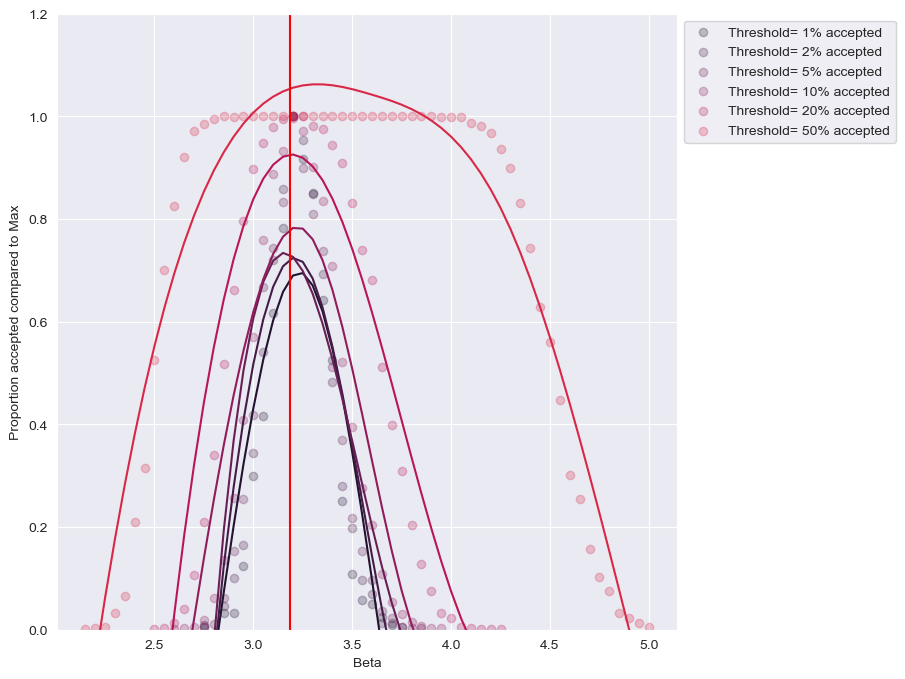

In [28]:
fig, ax0 = plt.subplots(figsize = (8,8))
cols = sns.color_palette("rocket",n_colors=10)
for i in range(len(threshold_schedule)):

    thresh = ABC_rejection(threshold_schedule[i],applied_ABC1)
    ploted = pd.DataFrame(thresh, columns=["Beta","Counts"])
    bet_dis = ploted.groupby("Beta").count()
    max_scale = max(bet_dis["Counts"])
    bet_dis["Counts"] = bet_dis["Counts"]/max_scale
    spline = sp.interpolate.splrep(bet_dis.index,bet_dis["Counts"],s=0.5)
    ax0.scatter(bet_dis.index,bet_dis["Counts"], label = f"Threshold= {reference[i]}% accepted",color = cols[i], alpha = 0.25)
    ax0.plot(bet_dis.index,sp.interpolate.BSpline(*spline)(bet_dis.index), color = cols[i])
mles = np.genfromtxt("../../Data/R0_3/Fitted/MLE_b_3.csv")
mle1 = mles[0]
ax0.set_ylabel("Proportion accepted compared to Max")
ax0.set_xlabel("Beta")
ax0.axvline(mle1, color = "red")
ax0.legend(bbox_to_anchor = (1,1))
ax0.set_ylim(0,1.2)
fig.show()